In [ ]:
install.packages("Rlab")
install.packages("tidyverse")
install.packages("sunburstR")
install.packages("corrplot")
install.packages("sm")
library(ggplot2)
library(corrplot) 
library(Rlab)
library(tidyr)
library(readr)
library(dplyr)

In [ ]:
# формирование даных
data_frame <- read.csv("https://raw.githubusercontent.com/IYunet/VIM-2022/main/3%20task/winemag-data-130k-v2.csv", header = TRUE)

head(data_frame)

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
5,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
6,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


## 1. Распределение оценок вина - распредление Бернулли

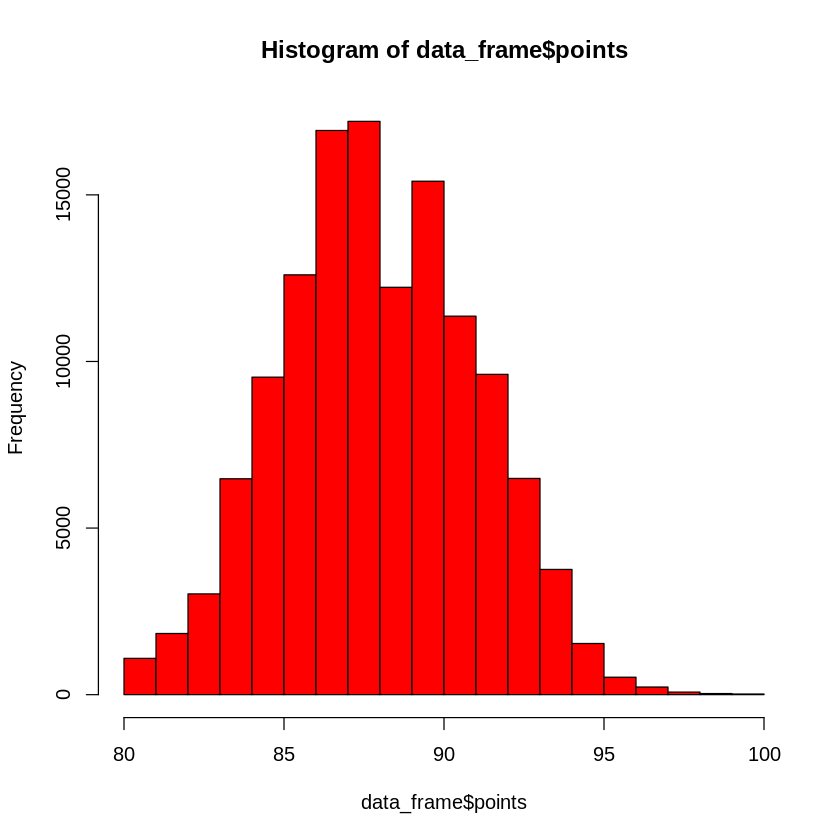

In [ ]:
hist(data_frame$points,breaks = 20, col='red')

**ВЫВОД:** Гипотеза не подтвердилась, так как из графика видно, что распределение является нормальным, а не Бернулли

## 2. Чем выше оценка вина, тeм больше его цена (прямая points и price)


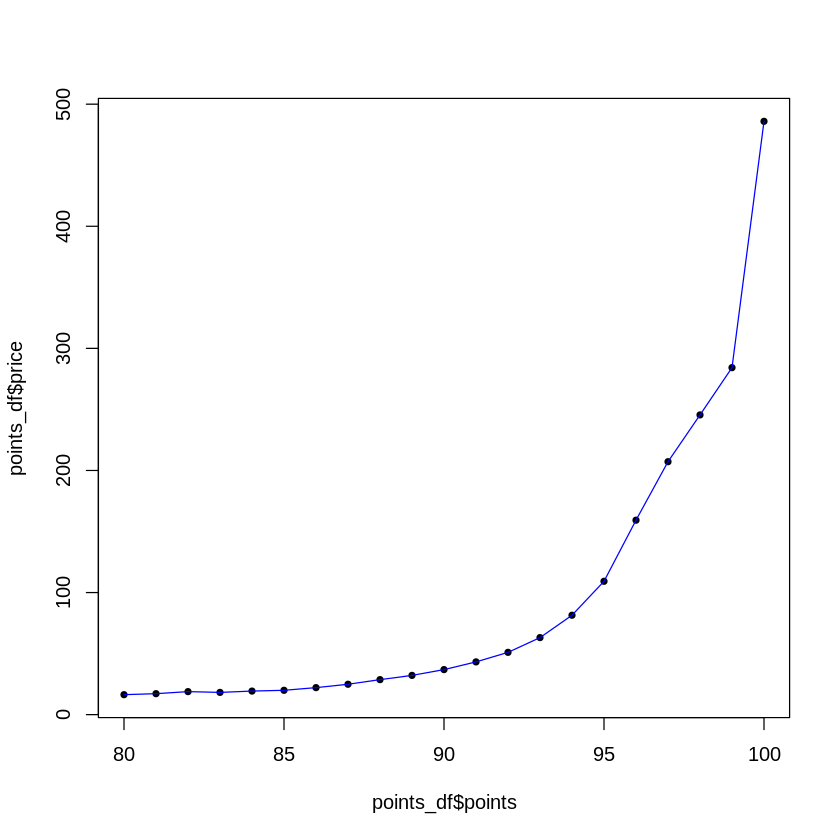

In [ ]:
#отбираем нужные данные 
points_df <- data_frame[,c(5,6)] 
points_df <- points_df %>% drop_na()
points_df <- points_df %>% group_by(points) %>% summarise(price = mean(price))

#график
 plot(points_df$points, points_df$price, pch=20) # для начала нанесем точки
 lines(points_df$points,points_df$price, col = 'blue') # теперь нанесем линии

**ВЫВОД:** Гипотеза подтвердилась. Мы видим, что чем выше оценка вина, тем больше его цена, но зависимость не линейная, а скорее всего экспоненциальная 

## 3. Наибольший средний балл у Франции

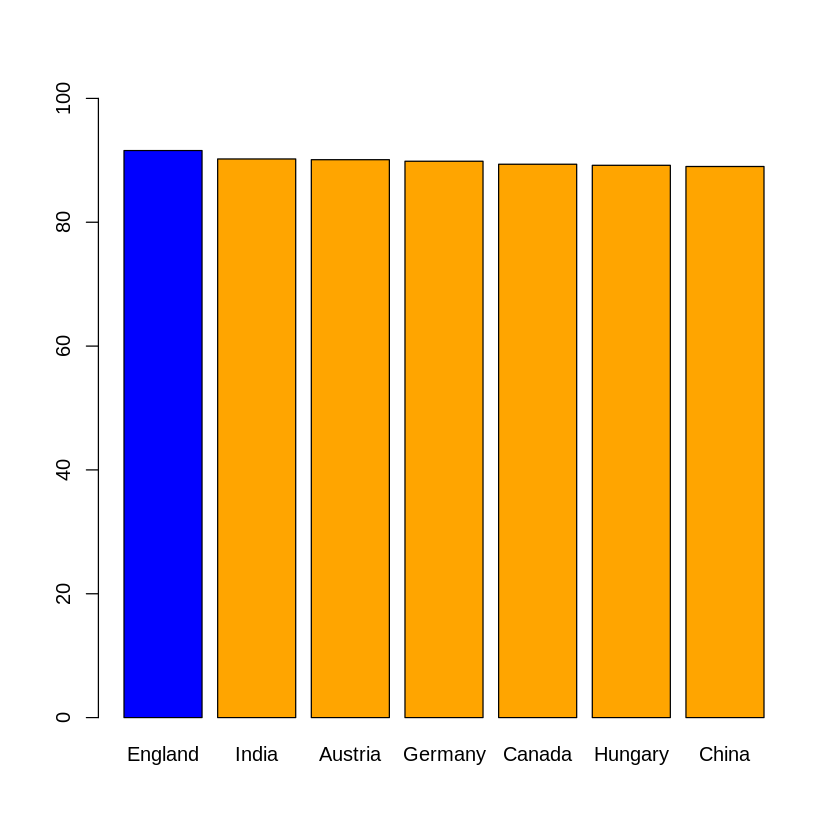

In [ ]:
count_mean_point <- data_frame %>% group_by(country) %>% summarise(mean_points = mean(points))
count_mean_point <- head(count_mean_point[order(count_mean_point$mean_points, decreasing=TRUE),],7)
barplot(count_mean_point$mean_points, names.arg=count_mean_point$country, ylim=c(0,100), col=c('blue','orange','orange','orange','orange','orange','orange'))

**ВЫВОД:** Гипотеза не подтвердилась. За все время дегустаций вин из разных стран, наибольшую среднюю оценку получали вина из Англии

## 4. В 2002 году было выпущенно больше всего вина

In [ ]:
#получение годов производства вина
wines_df <- data_frame
wines_df['year_of_creation'] <- 0
for (i in 1:length(wines_df$year_of_creation)){
  wines_df$year_of_creation[i] <- readr::parse_number(wines_df$title[i])
}
wines_df<- wines_df %>% drop_na()
wines<-wines_df[,c(13,15)]

In [ ]:
#топ 10 годов по продажам вина
wines<-wines_df[,c(13,15)]
wines<-wines[(wines$year_of_creation >= 1900) & (wines$year_of_creation <= 2022),]
wines_creations <- wines %>% group_by(year_of_creation) %>% tally()
wines_creations <- head(wines_creations[order(wines_creations$n, decreasing=TRUE),], n = 10)
wines_creations

year_of_creation,n
<dbl>,<int>
2013,14263
2012,13911
2014,13868
2011,10860
2010,10573
2015,8954
2009,8579
2008,6379
2007,6159


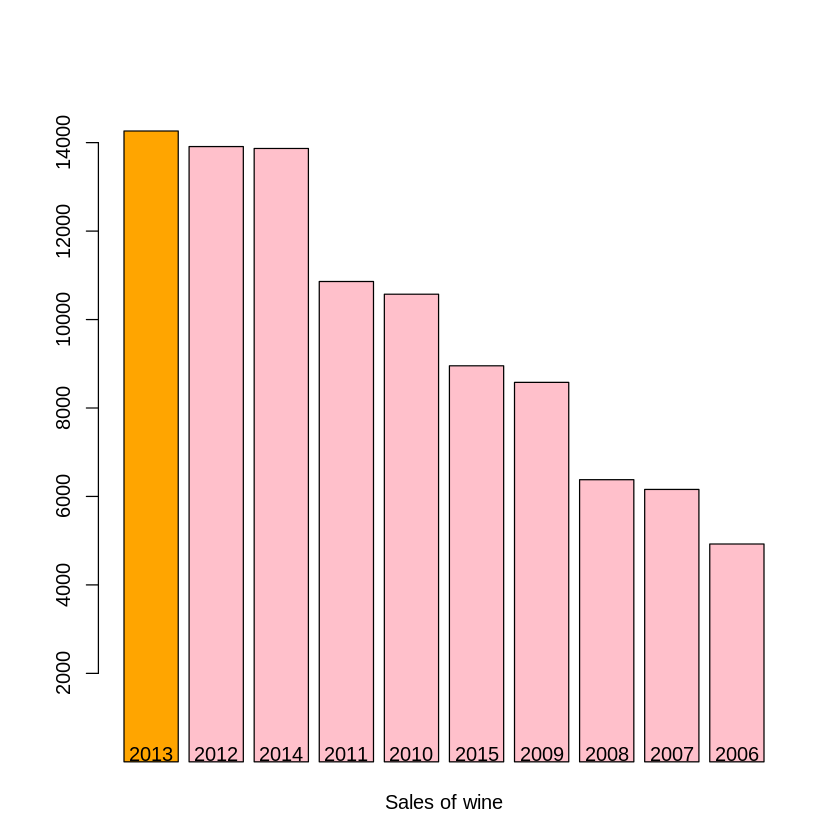

In [ ]:
#визуализация
barplot(height=wines_creations$n, names=wines_creations$year_of_creation, 
        xlab="Sales of wine",
        ylim = c(1000, 15000),
        col=c('orange','pink','pink','pink','pink','pink','pink','pink','pink','pink')
        )

**ВЫВОД:** Гипотеза не подтвердилась. Из диаграммы видно, что больше всего продаж было в 2013 году. Стоит отметить, что продажи начали увеличиваться только с 2006 года. Скорее всего, это связано с модернизацией жизни людей, улучшением качества жизни.

## 5. В трех странах, где больше всего производится вин во всем мире, самыми  популярными для выращивания - Albarossa, Mandilaria, Sercial

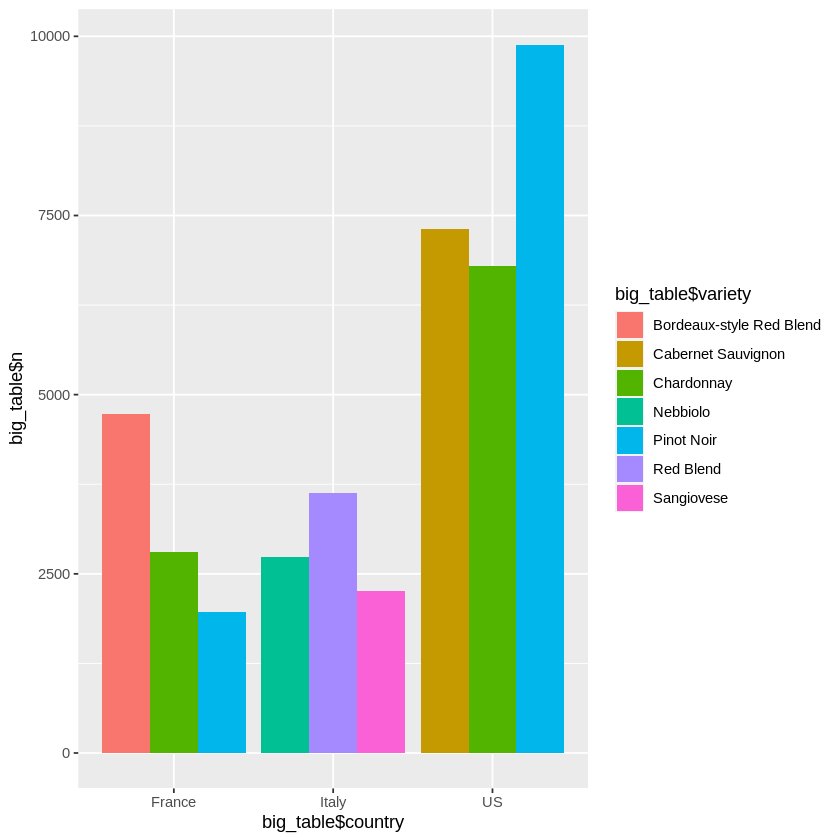

In [ ]:
top_country <- filter(data_frame, country != "")
top_country <- top_country %>% group_by(country) %>% tally() 
top_country <- head(top_country[order(top_country$n, decreasing=TRUE),], 3)
# таблица с полной информацией, где только топ 10 стран
tab_with_top_county <- filter(data_frame, data_frame$country %in% top_country$country)


top_variety <- tab_with_top_county %>% group_by(country, variety) %>% tally()

top_variety_1 <-filter(top_variety, country == "France")
top_variety_1 <- head(top_variety_1[order(top_variety_1$n, decreasing=TRUE),],3)

top_variety_2 <-filter(top_variety, country == "US")
top_variety_2 <- head(top_variety_2[order(top_variety_2$n, decreasing=TRUE),],3)

top_variety_3 <-filter(top_variety, country == "Italy")
top_variety_3 <- head(top_variety_3[order(top_variety_3$n, decreasing=TRUE),],3)


big_table <- rbind(top_variety_1,top_variety_2,top_variety_3)

# график
ggplot(big_table,                                      
       aes(x = big_table$country,
           y = big_table$n,
           fill = big_table$variety)) +
  geom_bar(stat = "identity",
           position = "dodge")

**ВЫВОД:** Гипотеза не подтвердилась, так как из графика видно, что во Франции популярные сорта - Bordeaux-style Red Blend, Chardonnay, Pinot Noir.

В Италии - Pinot Noir, Cabernet Sauvignon, Chardonnay.

В США - Red Blend, Nebbiol, Sangiovese.

## 6. Чем больше вин производит страна, темы выше цена на вино

In [ ]:
wines_count <- data_frame[,c(2,6,13)]
wines_count <- wines_count %>% drop_na()
wines_country_count <- wines_count %>% group_by(country) %>% tally() 
#топ 10 стран по производству вина
top10_country <- head(wines_country_count[order(wines_country_count$n, decreasing=TRUE),], 10)
#средняя цена на вино в каждой из топ 10 стран
price_of_top10 <- wines_count %>% group_by(country) %>% summarise(price = mean(price))
price_of_top10 <-price_of_top10[price_of_top10$country %in% top10_country$country,]
top10_country

country,n
<chr>,<int>
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4416
Argentina,3756
Austria,2799
Australia,2294


Warning message:
“Use of `price_of_top10$country` is discouraged. Use `country` instead.”
Warning message:
“Use of `price_of_top10$country` is discouraged. Use `country` instead.”
Warning message:
“Use of `price_of_top10$price` is discouraged. Use `price` instead.”
Warning message:
“Use of `price_of_top10$country` is discouraged. Use `country` instead.”
Warning message:
“Use of `price_of_top10$price` is discouraged. Use `price` instead.”


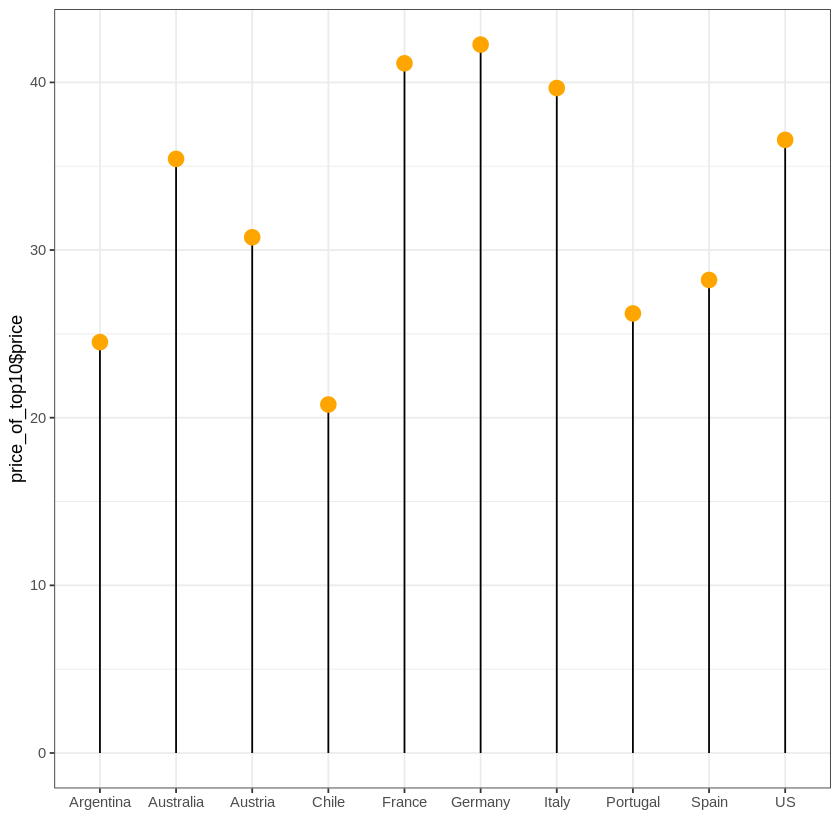

In [ ]:
price_of_top10 %>%
  ggplot( aes(x=price_of_top10$country, y=price_of_top10$price)) +
    geom_segment( aes(xend=price_of_top10$country, yend=0)) +
    geom_point( size=4, color="orange") +
    theme_bw() +
    xlab("")

**ВЫВОД:** Гипотеза не подтвердилась. На графике видно, что самые высокие цены распределились так: Германия, Франция, Италия,Америка и т.д, а производство вина так: Америка, Франция, Италия, Испания и т.д. Поэтому ценообразование не зависит от количества продаж. Конечно, в Италии и Франции прослеживается какая-то зависимость, но это, скорее всего, исключение из правил

## 7. Roger Voss предпочитает ставит оценку выше французкому вино, чем итальянскому

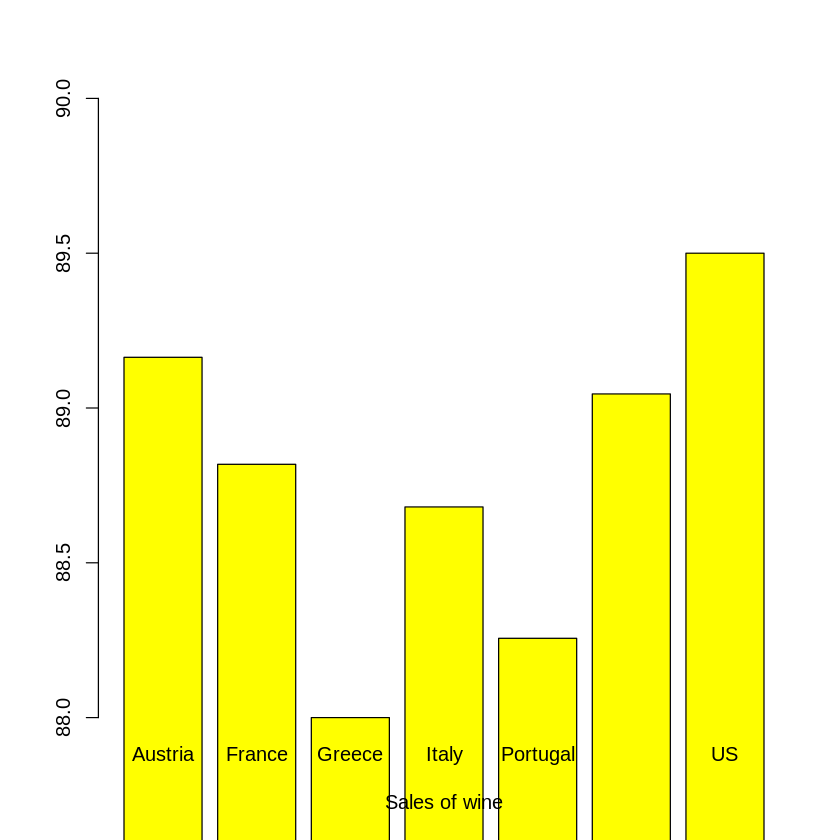

In [ ]:
#фильтрация 
for_roger <-data_frame[(data_frame$country == 'France' || data_frame$country == 'Italy'),]
for_roger <- for_roger[for_roger$taster_twitter_handle == '@vossroger',]
for_roger <- for_roger[,c(2,5)]
for_roger <- for_roger %>% group_by(country) %>% summarise(points = mean(points))
for_roger <- for_roger[-1,]
#визуализация
barplot(height=for_roger$points, names=for_roger$country, 
        xlab="Sales of wine",
        ylim = c(88, 90),
        col= "yellow"
        )

**ВЫВОД:**Гипотеза подтвердилась. Действительно, французкому вину дегустатор  Roger Voss ставит оценку выше, чем итальянскому, но его явные фавориты - вин из Америки.

## 8. Чем популярнее сорт винограда, тем ниже его цена

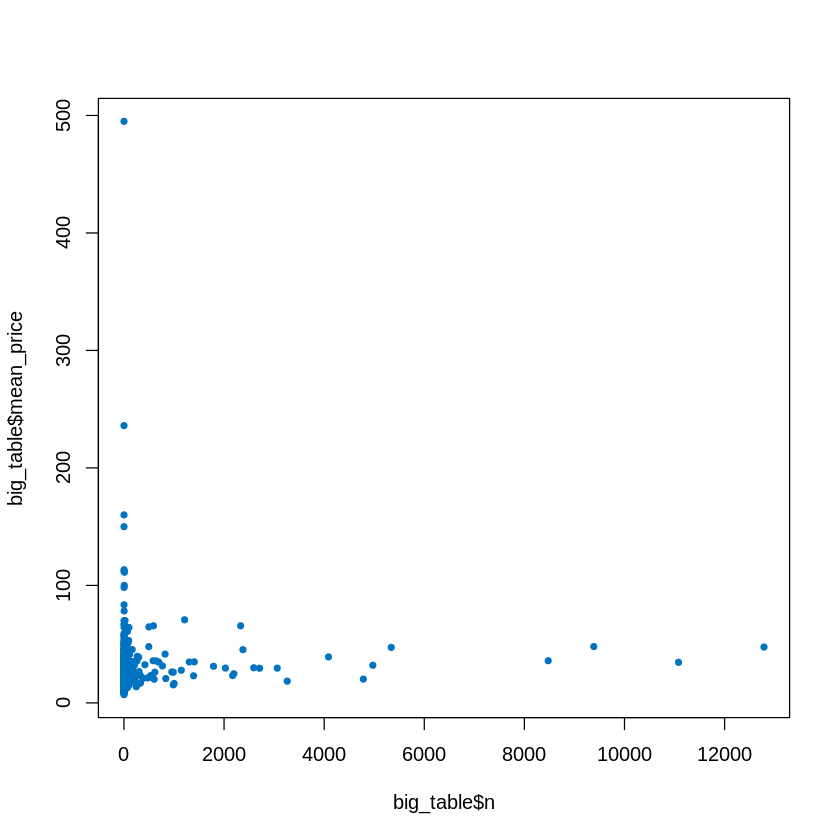

In [ ]:
top_variety <- filter(data_frame, (variety != '') & (price != ''))
top_variety <- top_variety %>% group_by(variety) %>% tally() 

top_price <- filter(data_frame, price != '')
top_price <- subset(top_price, top_price$variety %in% top_variety$variety)
top_price <- top_price %>% group_by(variety) %>% summarise(mean_price = mean(price))

big_table <- merge(x=top_price,y=top_variety,by="variety")

plot(big_table$n, big_table$mean_price, pch=20, col = "#0073C2FF") 

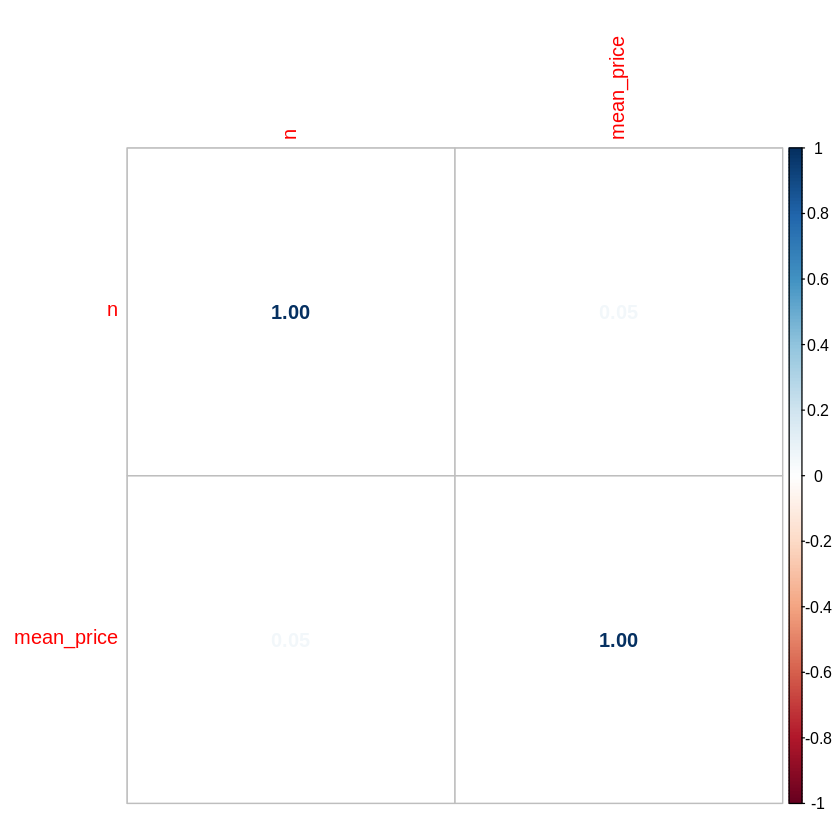

In [ ]:
corrplot(cor(big_table[c('n', 'mean_price')]), method = 'number')

**ВЫВОД:** по диаграмме разброса видно, что у самого популярного сорта винограда цена примерно 50 долларов - популярность сорта винограда не всегда является ключевым показателем для формирования цены, в данном случае популярность сорта почти не влияет на цену